# Data Visualization

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
df = pd.read_csv('creditcardcsvpresent.csv')

In [119]:
df.head(10)

,Merchant_id,Transaction date,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
0,3160040998,NaN,100.0,3000.0,N,5,Y,Y,0,0.0,0,Y
1,3160040998,NaN,100.0,4300.0,N,5,Y,Y,0,0.0,0,Y
2,3160041896,NaN,185.5,4823.0,Y,5,N,N,0,0.0,0,Y
3,3160141996,NaN,185.5,5008.5,Y,8,N,N,0,0.0,0,Y
4,3160241992,NaN,500.0,26000.0,N,0,Y,Y,800,677.2,6,Y
5,3160241992,NaN,500.0,27000.0,N,0,Y,Y,800,677.2,6,Y
6,3160272997,NaN,262.5,11287.5,N,0,N,N,900,345.5,7,Y
7,3162041996,NaN,185.5,11130.0,Y,20,N,N,0,0.0,0,Y
8,3162041996,NaN,185.5,6121.5,Y,20,N,N,0,0.0,0,Y
9,3162041996,NaN,185.5,7049.0,Y,20,N,N,0,0.0,0,Y


In [120]:
df.tail(10)

,Merchant_id,Transaction date,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
3065,6662015632,NaN,240.456831,2164.111484,N,0,N,N,0,0.0,0,N
3066,6664866404,NaN,277.746824,7499.164245,N,2,N,N,0,0.0,0,N
3067,6665254221,NaN,147.710676,2067.949461,N,0,N,N,0,0.0,0,N
3068,6665906072,NaN,695.391196,1390.782391,N,0,N,N,0,0.0,0,N
3069,6661273529,NaN,1000.000000,25000.000000,Y,0,Y,N,754,585.0,7,N
3070,6661273532,NaN,500.000000,11000.000000,Y,0,N,N,754,585.0,7,N
3071,6661273532,NaN,800.000000,0.000000,Y,0,N,N,754,585.0,7,N
3072,6661273533,NaN,800.000000,20800.000000,Y,0,N,N,754,585.0,7,N
3073,6661273532,NaN,1500.000000,12000.000000,Y,0,Y,Y,754,585.0,7,N
3074,6661273533,NaN,1500.000000,36000.000000,Y,0,Y,Y,754,585.0,7,N


In [121]:
df.shape

(3075, 12)

<AxesSubplot:ylabel='isFradulent'>

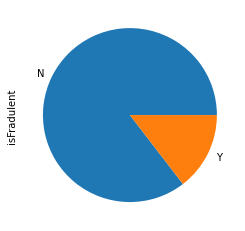

In [122]:
df['isFradulent'].value_counts().plot(kind='pie')

<AxesSubplot:xlabel='Average Amount/transaction/day', ylabel='Density'>

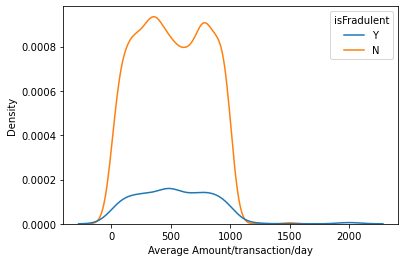

In [123]:
sns.kdeplot(x=df['Average Amount/transaction/day'],hue=df['isFradulent'])

<AxesSubplot:xlabel='isForeignTransaction', ylabel='count'>

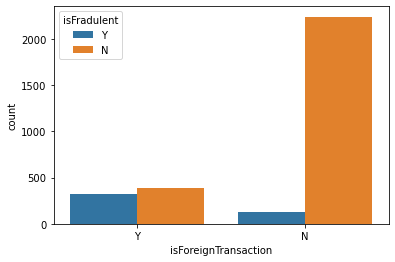

In [124]:
sns.countplot(x=df['isForeignTransaction'],hue=df['isFradulent'])

The number of foreign transaction which have took place among them most of them are fraud

<AxesSubplot:xlabel='isFradulent', ylabel='Transaction_amount'>

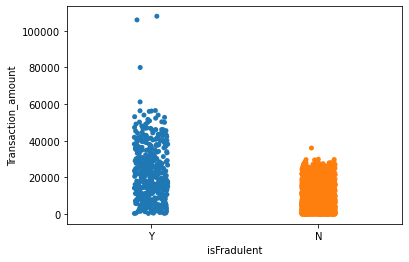

In [125]:
sns.stripplot(y=df['Transaction_amount'],x=df['isFradulent'])

Looks like big transaction amount are more likely to be a fraud

<AxesSubplot:xlabel='Is declined', ylabel='isHighRiskCountry'>

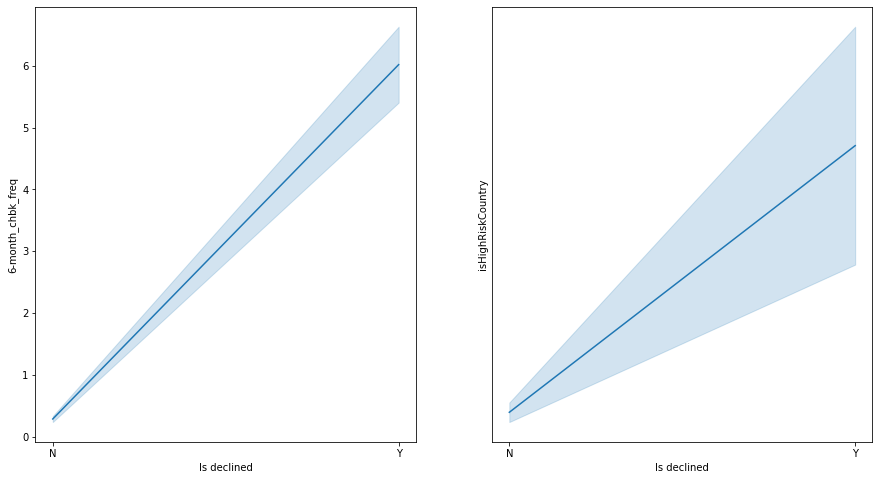

In [126]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
sns.lineplot(x=df['Is declined'],y=df['6-month_chbk_freq'])

plt.subplot(1,2,2)
sns.lineplot(x=df['Is declined'],y=df['isHighRiskCountry'])

> as number of decline increases number of charge back also increases

> Similarly is transaction is made to a high risk country chance of getting declined also increases

<AxesSubplot:xlabel='6-month_chbk_freq', ylabel='count'>

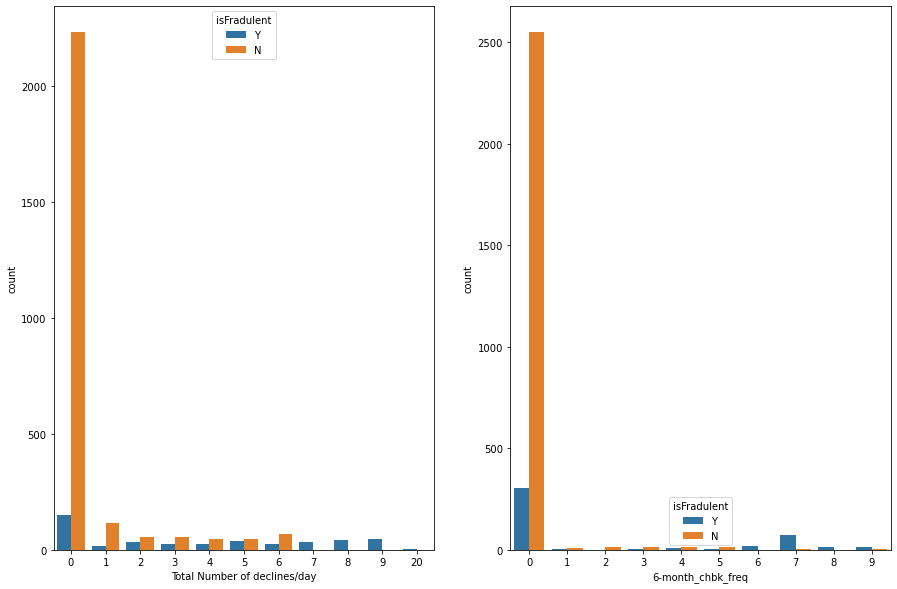

In [127]:
plt.figure(figsize=(15,10))

plt.subplot(1,2,1)
sns.countplot(x=df['Total Number of declines/day'],hue=df['isFradulent'])

plt.subplot(1,2,2)
sns.countplot(x=df['6-month_chbk_freq'],hue=df['isFradulent'])

> if we look carefully as the total number of declines increases the chances of being fradulent increases

> Similarly is frequency of charge_back increases then changes of being Fraud also increases

# Data Cleaning

In [128]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df['isFradulent'])
df['isFradulent'] = le.transform(df['isFradulent'])

le.fit(df['isHighRiskCountry'])
df['isHighRiskCountry'] = le.transform(df['isHighRiskCountry'])

le.fit(df['Is declined'])
df['Is declined'] = le.transform(df['Is declined'])

le.fit(df['isForeignTransaction'])
df['isForeignTransaction'] = le.transform(df['isForeignTransaction'])

In [130]:
df.drop(['Merchant_id','Transaction date'],axis=1,inplace=True)

In [131]:
from sklearn.utils import resample,shuffle

zero =df[df['isFradulent']==0]
one = df[df['isFradulent']==1]

upsampled1 = resample(one, replace=True, n_samples=zero.shape[0])

df = pd.concat([zero,upsampled1])

df = shuffle(df)

<AxesSubplot:xlabel='isFradulent', ylabel='count'>

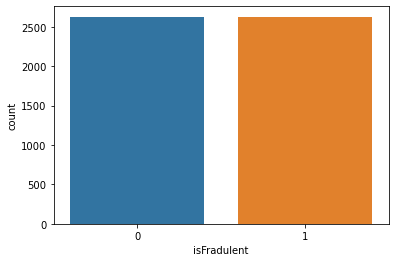

In [133]:
sns.countplot(x=df['isFradulent'])

# Model Building

In [134]:
x = df.drop(['isFradulent'],axis=1)
y = df['isFradulent']

In [135]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=101)

1)Logistic regression

<AxesSubplot:>

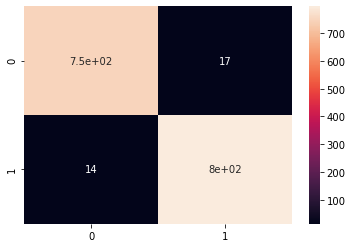

In [136]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

lg = LogisticRegression(max_iter=450)
lg.fit(x_train,y_train)
lg_predict = lg.predict(x_test)
lg_cm = confusion_matrix(lg_predict,y_test)
sns.heatmap(lg_cm,annot=True)

In [137]:
accuracy_score(y_test,lg_predict)*100

98.03424223208624

2)K-Nearset Neighbours

<AxesSubplot:>

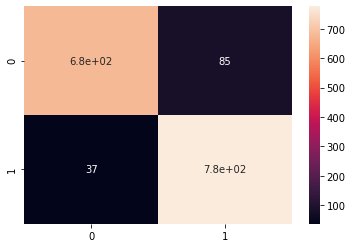

In [146]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=5)
kn.fit(x_train,y_train)
kn_predict = kn.predict(x_test)
kn_cm = confusion_matrix(y_test,kn_predict)
sns.heatmap(kn_cm,annot=True)

In [147]:
accuracy_score(y_test,kn_predict)*100

92.26379201014585

3)Decision Tree

<AxesSubplot:>

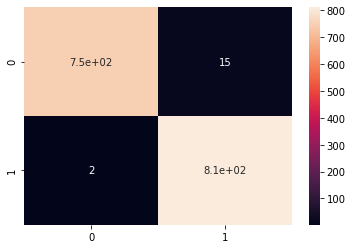

In [148]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_predict = dt.predict(x_test)
dt_cm = confusion_matrix(y_test,dt_predict)
sns.heatmap(dt_cm,annot=True)

In [149]:
accuracy_score(y_test,dt_predict)*100

98.92200380469245

4)Random Forest

<AxesSubplot:>

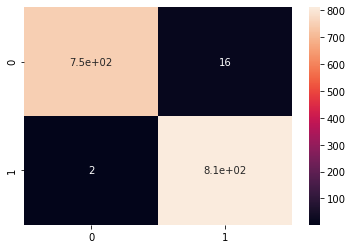

In [150]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf_predict = rf.predict(x_test)
rf_cm = confusion_matrix(y_test,rf_predict)
sns.heatmap(rf_cm,annot=True)

In [151]:
accuracy_score(y_test,rf_predict)*100

98.858592263792

Support vector machine

<AxesSubplot:>

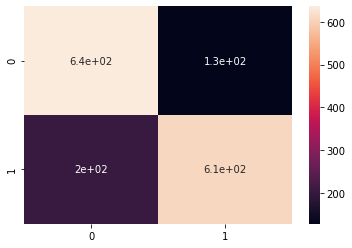

In [152]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(x_train,y_train)
svm_predict = svm.predict(x_test)
svm_cm = confusion_matrix(y_test,svm_predict)
sns.heatmap(svm_cm,annot=True)

In [153]:
accuracy_score(y_test,svm_predict)*100

78.94736842105263

Decison Tree has the heighest accuracy of 98.92%